Import libraries

In [6]:
import numpy
import librosa
import librosa.display
import matplotlib.pyplot as plotlib

Import audio file r1.wav<p>Get an array of the file's instantaneous amplitudes<p>Get the file's sampling rate

In [4]:
file = 'r1.wav'
instAmps, sr = librosa.load(file, mono=True, sr=None)
print(instAmps, sr)

[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 1.0070801e-03 1.5563965e-03
 1.8005371e-03] 44100


Get an array of each instananeous amplitude's corresponding moment in time (in seconds)

In [9]:
nSamps = instAmps.shape[0]
sampIdxs = numpy.arange(0, nSamps)
times = sampIdxs / sr
print(nSamps, sampIdxs, times)

1048847 [      0       1       2 ... 1048844 1048845 1048846] [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.37833107e+01
 2.37833333e+01 2.37833560e+01]


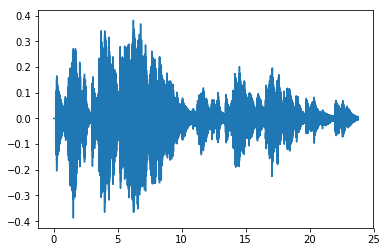

In [10]:
plotlib.plot(times, instAmps)

Add labels to the representation

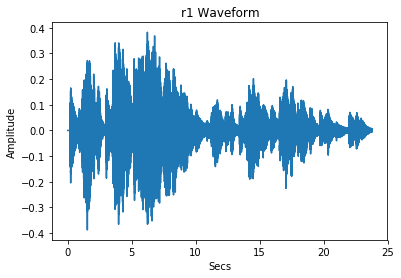

In [13]:
plotlib.title('r1 Waveform')
plotlib.xlabel('Secs')
plotlib.ylabel('Amplitude')
plotlib.plot(times, instAmps)